In [338]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

> **1. Introduction**

**Objective**

This dataset contains the information about the movies . For a movie to be commercial success , it depends on various factors like director, actors ,critic reviews and viewers reaction. Imdb score is one of the important factor to measure the movie's success. 

**Description of dataset attributes**

Please find the details for the datset attributes:-

1. Color :- Movie is black or coloured
2. Director_name:- Name of the movie director
3. num_critic_for_reviews :- No of critics for the movie
4. duration:- movie duration in minutes
5. director_facebook_likes:-Number of likes for the Director on his Facebook Page
6. actor_3_facebook_likes:- No of likes for the actor 3 on his/her facebook Page
7. actor2_name:- name of the actor 2
8. actor_1_facebook_likes:- No of likes for the actor 1 on his/her facebook Page
9. gross:- Gross earnings of the movie in Dollars
10. genres:- Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
11. actor_1_name:- Name of the actor 1
12. movie_title:-Title of the movie
13. num_voted_users:-No of people who voted for the movie
14. cast_total_facebook_likes:- Total facebook like for the movie
15. actor_3_name:- Name of the actor 3
16. facenumber_in_poster:- No of actors who featured in the movie poster
17. plot_keywords:-Keywords describing the movie plots
18. movie_imdb_link:-Link of the movie link
19. num_user_for_reviews:- Number of users who gave a review
20. language:- Language of the movie 
21. country:- Country where movie is produced
22. content_rating:- Content rating of the movie
23. budget:- Budget of the movie in Dollars
24. title_year:- The year in which the movie is released
25. actor_2_facebook_likes:- facebook likes for the actor 2
26. imdb_score:- IMDB score of the movie
27. aspect_ratio :- Aspect ratio the movie was made in
28. movie_facebook_likes:- Total no of facebook likes for the movie
    

**Case Study**


The dataset here gives the massive information about the movies and their IMDB scores respectively. We are going to analyze each and every factors which can influence the imdb ratings so that we can predict better results.The movie with the higher imdb score is more successful as compared to the movies with low imdb score. 

**2. Data Preprocessing**

In [339]:
#Reading the Data 

data=pd.read_csv("/content/movie_metadata.csv")

In [340]:
#Displaying the first 10 records

data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [341]:
#Shape of the dataset (no of rows and no of columns)

data.shape

(5043, 28)

In [342]:
#Displaying the data type of the dataset attributes 
data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [343]:
#Five point summary for the numerical columns in the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [344]:
#Dropping the Imdb link from the dataset

data.drop('movie_imdb_link', axis=1, inplace=True)

In [345]:
#Removing the color section as most of the movies is colored

data["color"].value_counts()

data.drop('color',axis=1,inplace=True)

In [346]:
#Checking for the columns present in the datset
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [347]:
#No of the missing values in the dataset

data.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [348]:
# split numerical variables
num=data.select_dtypes(exclude=object).columns
num

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [349]:
# split categorical variables
cat=data.select_dtypes(include=object).columns
cat

Index(['director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'language', 'country',
       'content_rating'],
      dtype='object')

In [350]:
# NA imputation
for i in num:
    if (data[i].skew()<-1 or data[i].skew()>1):
      data[i]=data[i].replace(np.NaN,data[i].median())
    else:
      data[i]=data[i].replace(np.NaN,data[i].mean())
    print(data[i])  
data[cat]=data[cat].fillna(data.mode().iloc[0])
print(data[cat])

0       723.0
1       302.0
2       602.0
3       813.0
4       110.0
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64
0       178.0
1       169.0
2       148.0
3       164.0
4       103.0
        ...  
5038     87.0
5039     43.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 5043, dtype: float64
0           0.0
1         563.0
2           0.0
3       22000.0
4         131.0
         ...   
5038        2.0
5039       49.0
5040        0.0
5041        0.0
5042       16.0
Name: director_facebook_likes, Length: 5043, dtype: float64
0         855.0
1        1000.0
2         161.0
3       23000.0
4         371.5
         ...   
5038      318.0
5039      319.0
5040        0.0
5041      489.0
5042       16.0
Name: actor_3_facebook_likes, Length: 5043, dtype: float64
0        1000.0
1       40000.0
2       11000.0
3       27000.0
4         131.0
         ...   
5038      637.0
5039 

In [351]:
# Recheck that all the null values are removed
data.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [352]:
#Removing the duplicate values in the datset

data.drop_duplicates(inplace=True)
data.shape

(4998, 26)

In [353]:
#Count of the language values 
data["language"].value_counts()

English       4674
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Arabic           5
Danish           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Thai             3
Chinese          3
Icelandic        2
None             2
Indonesian       2
Aboriginal       2
Romanian         2
Dari             2
Zulu             2
Panjabi          1
Urdu             1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: language, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


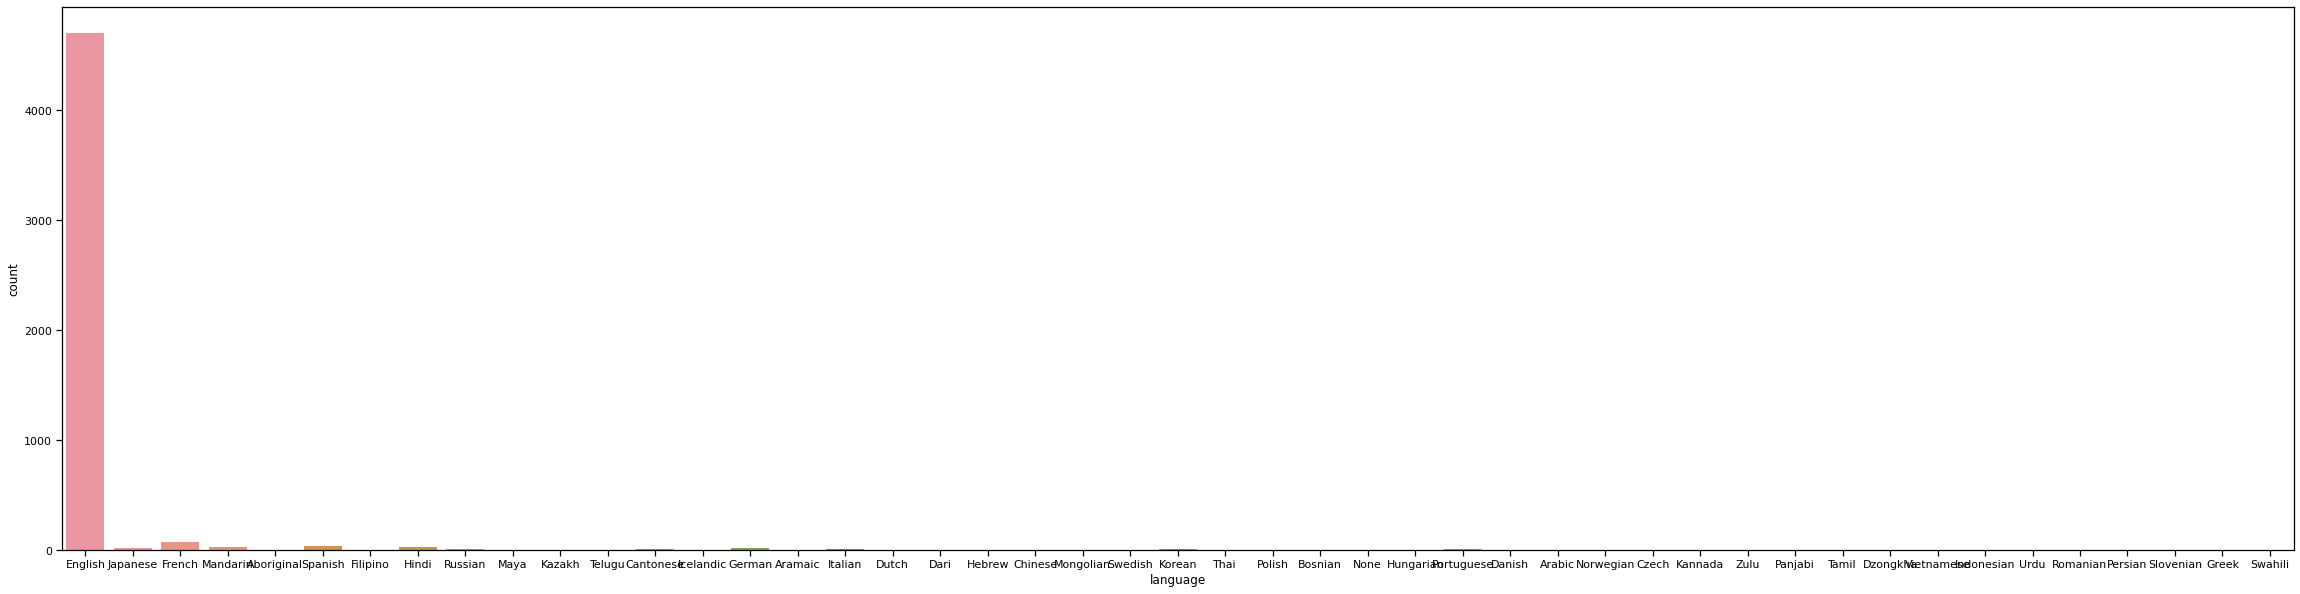

In [354]:
# Graphical presentaion 
plt.figure(figsize=(40,10))
sns.countplot(movie_df["language"])
plt.show()

In [355]:
#Most of the values for the languages is english we can drop the english column

data.drop('language',axis=1,inplace=True)

In [356]:
#Value counts for the countries 
data.country.value_counts()

USA              3778
UK                443
France            154
Canada            124
Germany            96
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: country, Length: 65, dtype: int64

In [357]:
vals = value_counts[:2].index
print (vals)

Index(['USA', 'UK'], dtype='object')


In [358]:
##get top 2 values of index
data['country'] = data.country.where(data.country.isin(vals), 'other')


In [359]:
#Successfully divided the country into three catogories 
data["country"].value_counts()

USA      3778
other     777
UK        443
Name: country, dtype: int64

In [360]:
data.head(10)


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,110.0,103.0,131.0,371.5,Rob Walker,131.0,25517500.0,Documentary,Doug Walker,...,based on novel,156.0,USA,R,20000000.0,2005.0,12.0,7.1,2.35,0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,...,sandman|spider man|symbiote|venom|villain,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,...,17th century|based on fairy tale|disney|flower...,387.0,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,...,artificial intelligence|based on comic book|ca...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,...,blood|book|love|potion|professor,973.0,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [361]:
#Removing the director name column
data.drop('director_name', axis=1, inplace=True)

In [362]:
#Removing the actor1 ,actor 2 and actor 3 names 

data.drop('actor_1_name',axis=1,inplace=True)
data.drop('actor_2_name',axis=1,inplace=True)
data.drop('actor_3_name',axis=1,inplace=True)

#Dropping the movie title 
data.drop('movie_title',axis=1,inplace=True)

# Dropping the plot keywords
data.drop('plot_keywords',axis=1,inplace=True)

In [363]:
#Value count of genres

data['genres'].value_counts()

Drama                                         235
Comedy                                        205
Comedy|Drama                                  189
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Action|Thriller|Western                         1
Action|Adventure|Drama|Family                   1
Comedy|Crime|Horror                             1
Name: genres, Length: 914, dtype: int64

In [364]:
#Most of the values are equally distributed in genres column ,so we can remove the genres column

data.drop('genres',axis=1,inplace =True)

In [365]:
#Adding the facebook likes of actor 2 and actor 3 together 
data['Other_actor_facebbok_likes']=data["actor_2_facebook_likes"] + data['actor_3_facebook_likes']

In [366]:
#Dropping the actor 2 and actor 3 facebook likes columns as they have been added together 

data.drop('actor_2_facebook_likes',axis=1,inplace=True)
data.drop('actor_3_facebook_likes',axis=1,inplace=True)
data.drop('cast_total_facebook_likes',axis=1,inplace=True)

In [367]:
#Ratio of the ratio of num_user_for_reviews and num_critic_for_reviews.

data['critic_review_ratio']=data['num_critic_for_reviews']/data['num_user_for_reviews']

In [368]:
#Dropping the num_critic_for_review

data.drop('num_critic_for_reviews',axis=1,inplace=True)
data.drop('num_user_for_reviews',axis=1,inplace=True)

In [369]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

data["imdb_binned_score"]=pd.cut(data['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [370]:
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 
data.drop('imdb_score',axis=1,inplace=True)

In [371]:
data.head(5)

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes,critic_review_ratio,imdb_binned_score
0,178.0,0.0,1000.0,760505847.0,886204,0.0,USA,PG-13,237000000.0,2009.0,1.78,33000,1791.0,0.236739,3
1,169.0,563.0,40000.0,309404152.0,471220,0.0,USA,PG-13,300000000.0,2007.0,2.35,0,6000.0,0.243942,3
2,148.0,0.0,11000.0,200074175.0,275868,1.0,UK,PG-13,245000000.0,2015.0,2.35,85000,554.0,0.605634,3
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,USA,PG-13,250000000.0,2012.0,2.35,164000,46000.0,0.301000,4
4,103.0,131.0,131.0,25517500.0,8,0.0,USA,R,20000000.0,2005.0,2.35,0,383.5,0.705128,3


**3. Handling the categorical data**

In [372]:
data = pd.get_dummies(data = data, columns = ['country'] , prefix = ['country'] , drop_first = True)
data = pd.get_dummies(data = data, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)

In [373]:
data.columns

Index(['duration', 'director_facebook_likes', 'actor_1_facebook_likes',
       'gross', 'num_voted_users', 'facenumber_in_poster', 'budget',
       'title_year', 'aspect_ratio', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'critic_review_ratio',
       'imdb_binned_score', 'country_USA', 'country_other', 'content_rating_G',
       'content_rating_GP', 'content_rating_M', 'content_rating_NC-17',
       'content_rating_Not Rated', 'content_rating_PG', 'content_rating_PG-13',
       'content_rating_Passed', 'content_rating_R', 'content_rating_TV-14',
       'content_rating_TV-G', 'content_rating_TV-MA', 'content_rating_TV-PG',
       'content_rating_TV-Y', 'content_rating_TV-Y7', 'content_rating_Unrated',
       'content_rating_X'],
      dtype='object')

**4. Splitting the data into training and test data**

In [374]:

X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster','budget','title_year','aspect_ratio','movie_facebook_likes','Other_actor_facebbok_likes','critic_review_ratio','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_TV-14','content_rating_TV-G','content_rating_TV-PG','content_rating_Unrated','content_rating_X'],data=data)
y=pd.DataFrame(columns=['imdb_binned_score'],data=data)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

**5.Feature scaling**

In [375]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**6. Classification Model Selection**

**Logistic Regression**

In [385]:
#Logistic Regression
logit = LogisticRegression(random_state=0)
logit.fit(X_train,y_train)
y_pred=logit.predict(X_test)
Accuracy_Score = accuracy_score(y_test,y_pred)
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Accuracy Score :  0.684


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [387]:
#Confusion matrix for logistic regression**
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0  26  30   0]
 [  0 162 248   1]
 [  0 123 835   7]
 [  0   2  37  29]]
Accuracy: 0.684


**KNN**

In [388]:
#KNN 
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[  0  21  35   0]
 [  0 206 205   0]
 [  0 147 818   0]
 [  0   0  59   9]]
Accuracy: 0.6886666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


**Decision Tree**



In [389]:
#Decision Tree
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train,y_train)
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[ 12  21  22   1]
 [ 29 199 176   7]
 [ 22 180 723  40]
 [  0   2  34  32]]
Accuracy: 0.644


**Random Forest**

In [390]:
#Random Forest
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[[  0  25  31   0]
 [  0 182 229   0]
 [  0  65 898   2]
 [  0   0  45  23]]
Accuracy: 0.7353333333333333


**XGBooosting**



In [391]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[  3  32  21   0]
 [  2 205 203   1]
 [  1  75 885   4]
 [  0   1  40  27]]
Accuracy: 0.7466666666666667


**Conclusion**

The conclusion is that Random Forest Algorithm along with the XG boosting have the accuracy of 73.5 and 74.6 respectively